# EJERCICIOS

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Concatenate
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

2025-01-27 20:02:04.969000: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-27 20:02:04.976432: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-27 20:02:04.985058: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-27 20:02:04.987590: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-27 20:02:04.994319: I tensorflow/core/platform/cpu_feature_guar

## EJERCICIO 1


Supongamos que queremos predecir dos objetivos diferentes (por ejemplo, precio y categoría) a partir de dos conjuntos de características diferentes (por ejemplo, características visuales y características de texto de un producto).

* Características visuales: un conjunto de 128 características numéricas, que podrían representar, por ejemplo, valores de píxeles o características extraídas de imágenes.
* Características de texto: un conjunto de 256 características numéricas, representando posiblemente la codificación de texto o características lingüísticas.
* Precio (Salida 1): un valor numérico que representa el precio de un producto.
* Categoría (Salida 2): una etiqueta de categoría, que asumiremos que puede tomar 10 valores diferentes (por ejemplo, 10 categorías diferentes de productos).

Voy a generar datos aleatorios

In [24]:
# Generación de datos ficticios
num_muestras = 1000  # Número de muestras en el conjunto de datos

# Características visuales: 128 características numéricas
caracteristicas_visuales = np.random.rand(num_muestras, 128)

# Características de texto: 256 características numéricas
caracteristicas_texto = np.random.rand(num_muestras, 256)

# Precio (Salida 1): Valor numérico (por ejemplo, precio de un producto)
precio = np.random.rand(num_muestras, 1)

# Categoría (Salida 2): 10 categorías posibles (codificadas en one-hot)
categorias = np.random.randint(0, 10, size=(num_muestras, 1))
categorias_one_hot = tf.keras.utils.to_categorical(categorias, num_classes=10)

Divide los datos en entrenamiento y prueba

In [25]:
# Dividir los datos
X_visual_train, X_visual_test, X_texto_train, X_texto_test, y_precio_train, y_precio_test, y_categoria_train, y_categoria_test = train_test_split(
    caracteristicas_visuales,  # Características visuales
    caracteristicas_texto,     # Características de texto
    precio,                    # Precio (etiqueta de regresión)
    categorias_one_hot,        # Categoría (etiqueta de clasificación)
    test_size=0.2,             # 20% de los datos para prueba
    random_state=42            # Semilla para reproducibilidad
)

# Verificar formas de los datos
print("Forma de X_visual_train:", X_visual_train.shape)
print("Forma de X_texto_train:", X_texto_train.shape)
print("Forma de y_precio_train:", y_precio_train.shape)
print("Forma de y_categoria_train:", y_categoria_train.shape)

print("Forma de X_visual_test:", X_visual_test.shape)
print("Forma de X_texto_test:", X_texto_test.shape)
print("Forma de y_precio_test:", y_precio_test.shape)
print("Forma de y_categoria_test:", y_categoria_test.shape)

Forma de X_visual_train: (800, 128)
Forma de X_texto_train: (800, 256)
Forma de y_precio_train: (800, 1)
Forma de y_categoria_train: (800, 10)
Forma de X_visual_test: (200, 128)
Forma de X_texto_test: (200, 256)
Forma de y_precio_test: (200, 1)
Forma de y_categoria_test: (200, 10)


Construye el modelo:
* Crea dos ramas de entrada, una para cada tipo de características.
* Las ramas se fusionarán para predecir el precio.
* Una de las ramas se utilizará también para predecir la categoria.

El esquema es el siguiente:

<img src="Datos/esquema_modelo_funcional.png" alt="esquema modelo funcional"/>

In [26]:
# Entrada para las características visuales (128 características)
input_visual = Input(shape=(128,), name="input_visual")

# Entrada para las características de texto (256 características)
input_texto = Input(shape=(256,), name="input_texto")

In [27]:
# Procesar las características visuales
x_visual = Dense(64, activation='relu')(input_visual)


In [28]:
# Procesar las características de texto
x_texto = Dense(128, activation='relu')(input_texto)


In [29]:
# Combinar las ramas visual y texto
combined = Concatenate()([x_visual, x_texto])

# Capas adicionales para la predicción del precio

output_precio = Dense(1, name="output_precio", activation="linear")(combined)  # Salida para el precio (regresión)

In [30]:
# Capas adicionales para la predicción de la categoría

output_categoria = Dense(10, activation='softmax', name="output_categoria")(x_texto)  # Salida para la categoría (clasificación)

In [31]:
# Crear el modelo
model = Model(inputs=[input_visual, input_texto], outputs=[output_precio, output_categoria])

Comprueba creando una imagen del modelo que es igual que el que se pide

In [32]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_visual        │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_texto         │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │      8,256 │ input_visual[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 128)       │     32,896 │ input_texto[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 192)       │          0 │ dense_4[0][0],    │
│ (Concatenate)       │                   │            │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_precio       │ (None, 1)         │        193 │ concatenate_2[0]… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_categoria    │ (None, 10)        │      1,290 │ dense_5[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 42,635 (166.54 KB)

 Trainable params: 42,635 (166.54 KB)

 Non-trainable params: 0 (0.00 B)

Compila el modelo especificando las pérdidas y métricas para cada salida (utiliza el optimizador Adam)

In [33]:
# Compilar el modelo
model.compile(
    optimizer='adam',
    loss={
        'output_precio': 'mean_squared_error',  # Pérdida para el precio (regresión)
        'output_categoria': 'categorical_crossentropy'  # Pérdida para la categoría (clasificación)
    },
    metrics={
        'output_categoria': 'accuracy', # Métrica para la categoría (precisión)
        'output_precio': 'mae'
    }
)

Entrena el modelo 

In [34]:
# Entrenar el modelo
history = model.fit(
    {'input_visual': X_visual_train, 'input_texto': X_texto_train},  # Asegúrate de que X_visual_train tiene forma (num_muestras, 128) y X_texto_train tiene forma (num_muestras, 256)
    {'output_precio': y_precio_train, 'output_categoria': y_categoria_train},
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10


ValueError: Exception encountered when calling Functional.call().

[1mInput 0 of layer "dense_5" is incompatible with the layer: expected axis -1 of input shape to have value 256, but received input with shape (32, 128)[0m

Arguments received by Functional.call():
  • inputs={'input_visual': 'tf.Tensor(shape=(32, 128), dtype=float32)', 'input_texto': 'tf.Tensor(shape=(32, 256), dtype=float32)'}
  • training=True
  • mask={'input_visual': 'None', 'input_texto': 'None'}

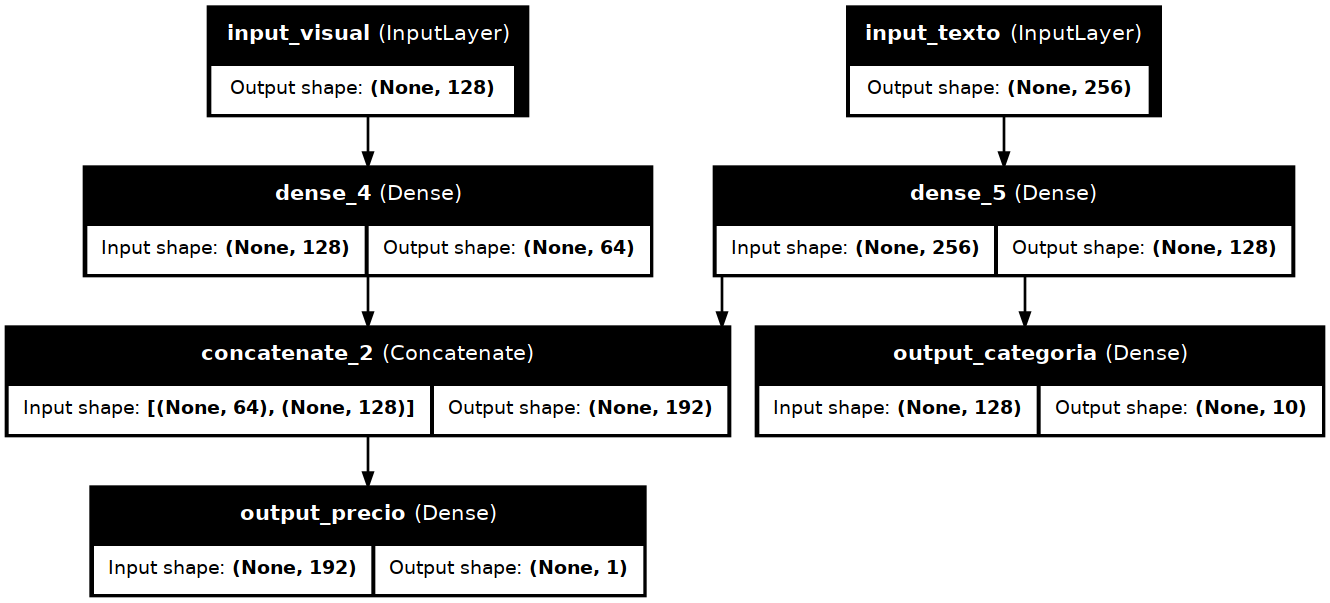

In [35]:
from keras.utils import plot_model
from IPython.display import Image, display

# Crear la imagen del modelo y guardarla en un archivo
plot_model(
model,
to_file="modelo_funcional.png", # Nombre del archivo de salida
show_shapes=True, # Mostrar las formas de los tensores en la imagen
show_layer_names=True, # Mostrar los nombres de las capas
dpi=96 # Resolución de la imagen
)

Evalúa el modelo en el conjunt de pruebas

Forma de y_categoria_train: (800, 10)


## EJERCICIO 2

El objetivo de este ejercicio es entrenar un modelo en un subconjunto de clases (Modelo A) y luego usar este modelo para entrenar otro modelo en un subconjunto diferente de clases (Modelo B), primero sin y luego con el conocimiento transferido del Modelo A.

Carga los datos de CIFAR-10, representa alguna de sus imágenes con sus etiquetas, haz una lista con las etiquetas que tiene (busca en internet) y normaliza los datos dividiendo entre 255.0.

Divide los datos en conjuntos de entrenamiento, pruebas y validación para el modelo A y para el modelo B:
* El modelo A utiliza las clases "avión", "automóvil", "pájaro" y "gato"
* El modelo B utiliza las clases "ciervo", "perro", "rana" y "caballo" 

Entrena el Modelo A

Entrenar el Modelo B desde 0

Entrenar el Modelo B utilizando las capas aprendidas del Modelo A (excepto la capa de salida)

Evaluar los dos modelos para el conjunto de datos B en el conjunto de pruebas

¿En este caso merece la pena?